In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import numpy as np
from skimage.external.tifffile import imread
from skimage import io
import os
from os.path import join as oj
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate, train_test_split
import data

X, Y = data.get_data()

/system/linux/anaconda3.7/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


# look at data

/system/linux/anaconda3.7/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


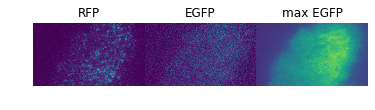

In [2]:
R, C = 1, 3
plt.figure(figsize=(C*2, R*2))

plt.subplot(R, C, 1)
plt.title('RFP')
plt.imshow(X[0])

plt.subplot(R, C, 2)
plt.title('EGFP')
plt.imshow(Y[0])

plt.subplot(R, C, 3)
plt.title('max EGFP')
plt.imshow(Y.sum(axis=0))
plt.subplots_adjust(hspace=0.1, wspace=0)

for i in range(1, 4):
    plt.subplot(R, C, i)
    plt.axis('off')

# extract single series as feature

In [2]:
X_feat, y_max = data.extract_single_pixel_features(X, Y)
print('shapes', X_feat.shape, y_max.shape)

shapes (114750, 300) (114750, 1)


In [4]:
X_feat.shape

(114750, 300)

In [5]:
# m.fit(X_feat, Y_max)
X_train, X_test, Y_train, Y_test = train_test_split(X_feat, y_max, test_size=0.33, random_state=42)
# results = cross_validate(m, X_feat, y_max, cv=2, return_train_score=True, return_estimator=True)

# predict reg

In [13]:
# m = LinearRegression()
m = MLPRegressor()

In [14]:
m.fit(X_train, Y_train)

/accounts/projects/vision/.local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [15]:
m.score(X_test, Y_test)

-4.051422686745539

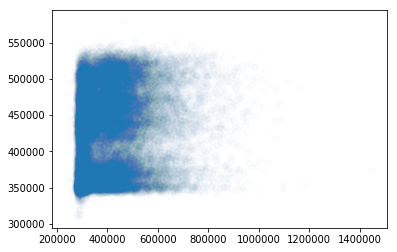

In [16]:
plt.plot(m.predict(X_test), Y_test, 'o', alpha=0.01)
plt.show()

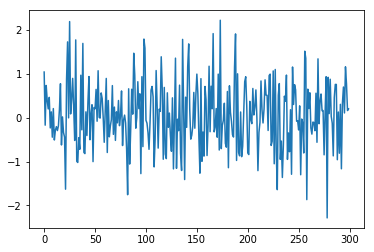

In [12]:
# plt.imshow(m.coef_)
plt.plot(m.coef_.flatten())

## predict logistic

In [78]:
thresh = np.percentile(Y_max, 70)

In [83]:
Y_thresh_train = 1 * (Y_train > thresh)
Y_thresh_test = 1 * (Y_test > thresh)

In [85]:
m = LogisticRegression()

In [86]:
m.fit(X_train, Y_thresh_train)

/accounts/projects/vision/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/accounts/projects/vision/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
m.score(X_test, Y_thresh_test)

0.7006971585507552

(array([3.500e+01, 2.130e+02, 8.940e+02, 2.804e+03, 5.608e+03, 1.707e+03,
        5.900e+01, 9.000e+00, 4.000e+00, 1.000e+00]),
 array([0.05071709, 0.11467591, 0.17863474, 0.24259356, 0.30655239,
        0.37051122, 0.43447004, 0.49842887, 0.56238769, 0.62634652,
        0.69030534]),
 <a list of 10 Patch objects>)

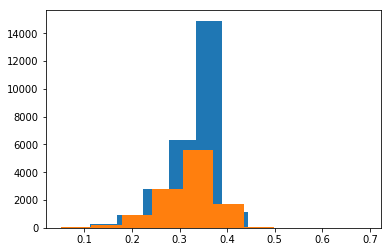

In [101]:
preds = m.predict_proba(X_test)[:, 1:2]
plt.hist(preds[Y_thresh_test==0])
plt.hist(preds[Y_thresh_test==1])
# plt.plot(, Y_thresh_test, 'o', alpha=0.5)

# eda

In [18]:
Y.shape

(300, 255, 450)

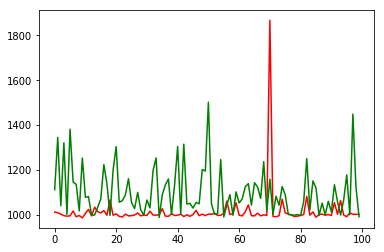

In [25]:
T = 100
plt.plot(X[:T, 0, 2], color='red')
plt.plot(Y[:T, 0, 2], color='green')

# patch features

In [10]:
X_patches_flat, Y_centers = data.extract_patch_features(X, Y)

In [31]:
m = LinearRegression()

In [ ]:
m.fit(X_patches_flat, Y_centers)

(array([8.2270e+03, 3.0156e+04, 3.4457e+04, 2.7832e+04, 6.7820e+03,
        1.2030e+03, 3.7300e+02, 9.9000e+01, 3.8000e+01, 7.0000e+00]),
 array([1396. , 1801.4, 2206.8, 2612.2, 3017.6, 3423. , 3828.4, 4233.8,
        4639.2, 5044.6, 5450. ]),
 <a list of 10 Patch objects>)

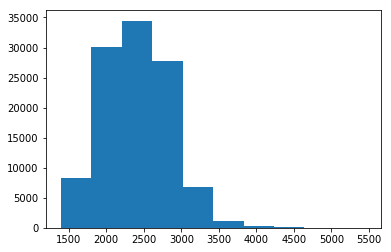

In [30]:
plt.hist(Y_centers)

In [15]:
print(X_patches.shape, Y_patches.shape)

(109174, 9, 9, 300) (109174, 9, 9)


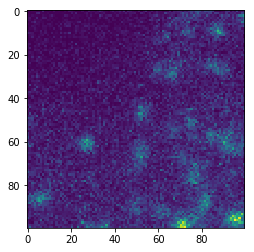

In [4]:
plt.imshow(X_feat[100:200, 100:200, 0])